# Sersic Profili

Sersic profil fonksiyonu, galaksilerin ışık yoğunluğunun galaksinin merkezinden uzaklaştıkça nasıl değiştiğini tanımlar. Sersic profili, hem eliptik galaksilerde hem de sarmal galaksilerin ışık dağılımında kullanılır. Bu tür profiller, galaksilerin yapısını anlamamıza ve farklı galaksi türlerini karşılaştırmamıza olanak tanır. Özellikle galaksi morfolojisi ve evrim çalışmaları için hayati öneme sahiptir.

Sersic fonksiyonunu tanımlamak için temel parametreler kullanılır: 
+ $R_e$ (etkili yarıçap), galaksi ışığının yarısının içinde bulunduğu yarıçapı belirler; 
+ $I_e$, etkili yarıçapta yüzey parlaklığını tanımlar; ve 
+ $n$, Sersic indeksidir. n değeri, profillin şeklini belirler; 
    + _düşük n_ değerleri (örneğin, n=1) eksponansiyel diskler için uygundur, 
    + _yüksek n_ değerleri ise (örneğin, n=4) de Vaucouleurs profiline uyan eliptik galaksileri tanımlar.

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
import pdb
#from tools import plots


In [2]:
def profile(r, I_e, R_e=1., n=1., mag=False) :
    """
    routine to return Sersic profile

    Args:
        r:  array-like
            input array of radii at which to calculate profile
       I_e: float
            surface brightness at effective radius, in intensity or magnitude
            units, depending on mag
       R_e: float, optional
            effective radius, default=1.
       n:  sersic index (default=1, i.e. exponential)
       mag: bool, optional
            return in mag units if True, default=False
    """

    bn=1.99*n-0.327
    I_r = np.exp (-bn * ((r/R_e)**(1./n) - 1) )           # Sersic function
    if mag :
        return I_e - 2.5 *np.log10(I_r)
    else :
        return I_e * I_r


Bir halkadaki akıyı hesaplamak için bir fonksiyon yazın: 2 $\pi$ r SB(r)

In [3]:
def flux(r, I_e=0., R_e=1., n=1) :
    """ Helper routine to calculate annular flux at given radius for integrator
    """
    return 2*np.pi*r*profile(r,I_e,R_e,n=n)

Bir dizi farklı Sersic indeksinde profilleri hesaplama ve çizme işlevi. İsteğe bağlı olarak kümülatif profili hesaplar ve çizer.

In [9]:
def profiles(r=np.arange(0.,5.,0.01),ns=[0.6,1.0,1.4,2.0,2.6,3.2,4.0],
             I_e=1.,R_e=1.,cumulative=False, mag=True, R_e_max = 1000.) :
    """ Plot profiles of various Sersic indices

        r : arraylike, optional
            radii to calculate profiles at, default=np.arange(0.,5,0.01)
        ns : arraylike, optional
             set of Sersic indices to plot, default=[0.6,1.0,1.4,2.0,2.6,3.2,4.0]
        I_e : float, optional
             SB at effective radius, default=1.
        R_e : float, optional
             Effective radius, default=1.
        cumulative: bool, optional
             if True, plot cumulative profile
    """

    # get sum for n=1 (used only if cumulative=True), using scipy.integrate.quad() routine
    sum1 = quad(flux,0.,R_e_max,args=(I_e,R_e,1))

    # loop over Sersic indices, plotting each profile
    for n in ns :
        if cumulative :
            # integrate to R_e_max for normalizing total
            sum = quad(flux,0.,R_e_max,args=(1.,1.,n))

            # Integrate to each radius, wasteful since we keep integrating over same area!
            cum=[]
            for rr in r :
                cum.append(quad(flux,0.,rr,args=(1.,1.,n))[0]/sum[0])
   
            plt.plot(r,cum,label='n={:4.1f}'.format(n))
            print(n,sum[0]/sum1[0])
        else :
            plt.plot(r,profile(r,I_e,R_e,n=n,mag=mag),label='n={:4.1f}'.format(n))

    # annotate plot
    plt.legend()
    plt.xlabel('Radius (r/R_e)')
    if cumulative :
        plt.ylabel('Cumulative flux')
    else :
       
        # invert axes if magnitude units
        if mag: 
            plt.ylabel('Surface brightness (mag)')
            plt.ylim(plt.ylim()[::-1])
        else :
            plt.ylabel('Surface brightness')


**Kümülatif Olmayan Görselleştirme:** Bu tür görselleştirmede, farklı Sersic indekslerine (n) sahip profillerin yüzey parlaklıklarının radyal(yarıçapa göre) dağılımlarını doğrudan gözlemleriz. **Bu grafikler, galaksinin merkezinden uzaklaştıkça yüzey parlaklığının nasıl değiştiğini gösterir**. Her bir n değeri için farklı bir profil elde ederiz. Örneğin, n=1 değeri eksponansiyel bir diski temsil ederken, n=4 değeri de Vaucouleurs profiline uyan eliptik bir galaksiyi temsil eder. Bu grafikler, galaksi türleri arasındaki farkları belirgin bir şekilde görmemizi sağlar.

**Kümülatif Görselleştirme:** Bu tür görselleştirmede ise, belirli bir yarıçapa kadar olan toplam ışık miktarını (akışı) gözlemleriz. **Bu grafik, galaksinin farklı yarıçaplarda nasıl birikimli olarak ışık yayıldığını gösterir.** Her bir yarıçap için, bu yarıçapa kadar olan toplam ışığı hesaplayarak birikimli bir profil oluştururuz. Kümülatif grafikler, galaksinin genel ışık dağılımını ve merkezdeki yoğunlaşmayı daha iyi anlamamızı sağlar. Ayrıca, farklı n değerlerine sahip profiller arasındaki toplam ışık dağılım farklarını belirginleştirir.

```
Kısacası:

Kümülatif olmayan görselleştirme, yüzey parlaklığının radyal dağılımını ve galaksinin yapısal özelliklerini belirgin bir şekilde ortaya koyar.

Kümülatif görselleştirme ise, galaksinin genel ışık dağılımını ve farklı yarıçaplardaki toplam ışık miktarını analiz etmemizi sağlar.
```

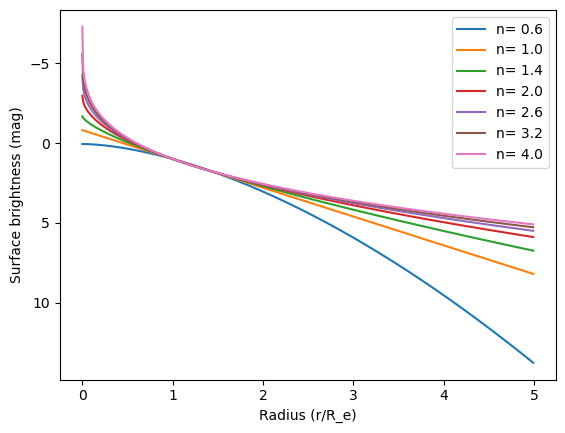

In [10]:
profiles()

0.6 0.8157121442130806
1.0 1.0
1.4 1.15847917856495
2.0 1.3633679318599583
2.6 1.5417624837887856
3.2 1.7017531846552076
4.0 1.894309704352981


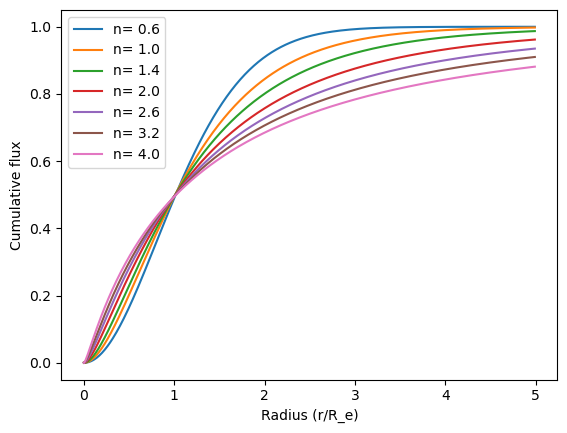

In [11]:
profiles(cumulative=True)

`straatman` fonksiyonu, belirli `R_e` ve `n` değerleri için Sersic profillerini çizer ve bu profilleri belirli bir yarıçapta normalize eder. Bu normalize edilmiş profiller, farklı galaksi türlerinin yüzey parlaklık profillerini karşılaştırmamıza olanak tanır. Fonksiyon, aynı zamanda, bu profilleri belirli bir yarıçapta normalize ederek, çeşitli galaksi türleri arasındaki farkları daha belirgin hale getirir.

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_9054/1531392851.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel(f'$\mu$')


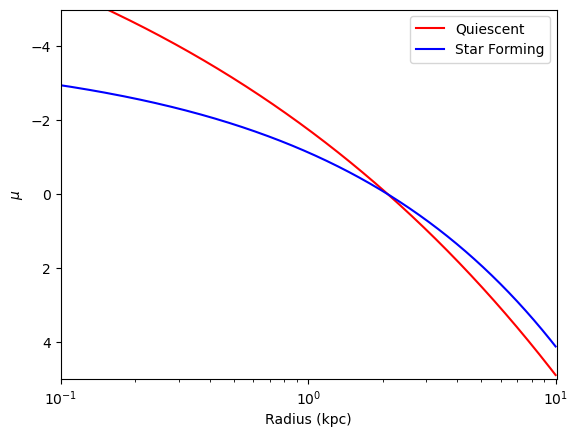

In [15]:

def straatman(R_es=[0.85, 2.62], ns=[4.14, 2.17], labels=['Quiescent', 'Star Forming'], colors=['red', 'blue'], rnorm=2.1):
    """
    Plot multiple Sersic profiles, normalized at some radius
    """
    r = np.arange(0., 10., 0.01)
    fig, ax = plt.subplots(1, 1)
    
    for R_e, n, label, color in zip(R_es, ns, labels, colors):
        prof = profile(r, I_e=1, R_e=R_e, n=n, mag=True)
        
        # construct an interpolating function
        interp = interp1d(r, prof)
        
        # interpolate at normalizing radius and plot
        norm = interp(rnorm)
        ax.plot(r, prof - norm, label=label, color=color)
        
    ax.set_xlim([0.1, 10.1])
    ax.set_ylim([5, -5])
    ax.set_xscale('log')
    ax.set_xlabel('Radius (kpc)')
    ax.set_ylabel(f'$\mu$')
    ax.legend()
    plt.show()

straatman()


Boris Petrosian, Ermeni kökenli bir Amerikalı astrofizikçidir ve Petrosian yarıçapı kavramını tanımlayan kişidir. Onun çalışmaları, galaksilerin ve diğer gök cisimlerinin fotometrik analizini geliştirmiştir. Petrosian yarıçapı özellikle önemli bir ölçüm aracıdır çünkü gözlemsel hatalara karşı oldukça dayanıklıdır ve farklı galaksiler arasındaki karşılaştırmalarda tutarlılığı sağlar. Bu özellik, galaksilerin yapısını anlamamızda büyük bir avantaj sağlar.

In [21]:
def petro(R_e=1, n=1, eta=0.2, plot=False):
    """
    Calculate Petrosian radius for Sersic profile with index n
    I_e : float, optional
         SB at effective radius, default=1.
    n : float, optional
         Sersic index,  default=1.
    eta : float, optional
         Critical value of Petrosian ratio to determine Petrosian radius
    """
    r = np.arange(0., 10. * R_e, 0.01)
    ratio = []
    I_e = 1  # note Petrosian ratio independent of I_e!
    for rr in r:
        # integrate flux internal to rr
        tot = quad(flux, 0., rr, args=(I_e, R_e, n))[0]
        # Petrosian ratio = SB / average_internal_flux
        ratio.append(profile(rr, I_e, R_e, n=n) / (tot / (np.pi * rr ** 2)))
    
    # interpolate to desired ratio, eta
    interp = interp1d(ratio, r)
    petrorad = interp(eta)
    
    if plot:
        fig, ax = plt.subplots(1, 1)
        ax.plot(r, ratio, label='Petrosian Ratio')
        ax.axvline(x=petrorad, color='r', linestyle='--', label='Petrosian Radius')
        ax.set_xlabel('Radius')
        ax.set_ylabel('Petrosian Ratio')
        ax.grid()
        ax.set_title('R_e: {:.2f}   n: {:.2f}   R_petro : {:.2f}'.format(R_e, n, petrorad))
        ax.legend()
        plt.show()
    
    return petrorad

Calculate Petrosian radius for Straatman et al quiescent and star forming stack model parameters

/tmp/ipykernel_9054/787910145.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ratio.append(profile(rr, I_e, R_e, n=n) / (tot / (np.pi * rr ** 2)))


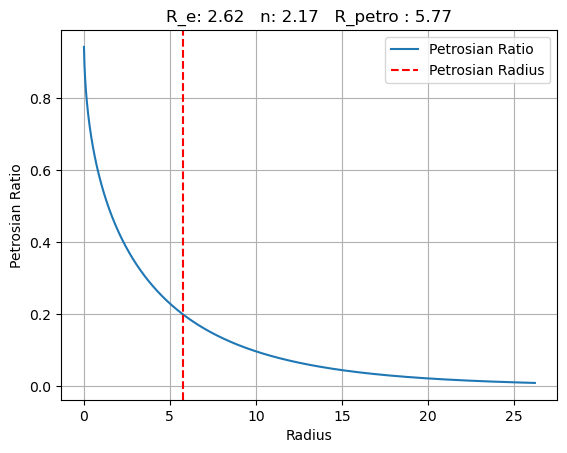

star forming: R_p = 5.77


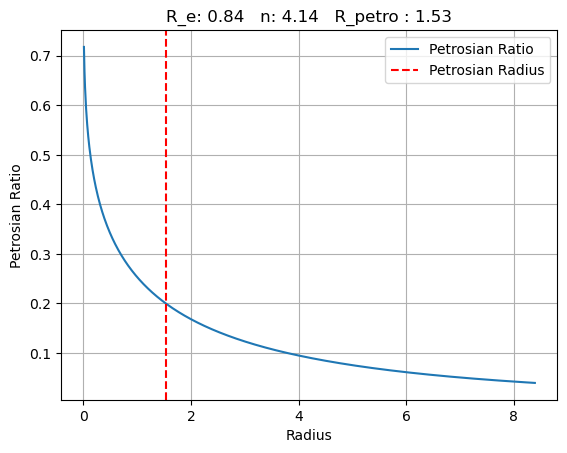

quiescent: R_p = 1.53


In [22]:
print('star forming: R_p = {:.2f}'.format(petro(R_e=2.62,n=2.17,plot=True)))
print('quiescent: R_p = {:.2f}'.format(petro(R_e=0.84,n=4.14,plot=True)))

# Kaynak 
+ Eklelyeceğiz... nereye yazdığıımı bulabilirsem.